In [1]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
np.random.seed(100)
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.dpi'] = 180

# Grid World

[]()|[]()|[]()|[]()|[]()
-|-|-|-|-
1|2|3|4|5
6|7|8|9|10
11|12|13|14|15
16|17|18|19|20
21|22|23|24|25

### Set Rewards


$A = 2$ and $A^{'} = 22$ are special states. Any action in $A$ takes to $A^{'}$ with reward of 10

$B = 4$ and $B^{'} = 14$ are special states. Any action in $B$ takes to $B^{'}$ with reward of 5

Any action in boundary state which transitions to state outside grid results in reward of -1 with no change in state

All other actions in states give reward of 0

#### Initialize rewards

In [2]:
R_s_a = {}
actions = ['l', 'u', 'r', 'd']
for state in range(25):
    for action in actions:
        R_s_a[(state, action)] = 0

#### Reward for boundary states

In [3]:
for state in [0, 5, 10, 15, 20]:
    R_s_a[(state, 'l')] = -1

for state in [0, 1, 2, 3, 4]:
    R_s_a[(state, 'u')] = -1

for state in [4, 9, 14, 19, 24]:
    R_s_a[(state, 'r')] = -1

for state in [20, 21, 22, 23, 24]:
    R_s_a[(state, 'd')] = -1

#### Special states

In [4]:
for action in actions:
    R_s_a[(1, action)] = 10
    R_s_a[(3, action)] = 5

In [5]:
#R_s_a

### Policy

In [6]:
def pi(state=None):
    selected_action = actions[np.random.randint(0, len(actions))]
    return selected_action

In [7]:
runs=100000
[(k, v/runs) for (k, v) in Counter([pi() for _ in range(runs)]).items()]

[('l', 0.25242), ('d', 0.25182), ('r', 0.2487), ('u', 0.24706)]

### State Transition

In [8]:
def get_next_state(current_state, action):
    next_state = current_state
    grid_row = current_state // 5
    grid_column = current_state % 5
    if action == 'u':
        est_next_state = current_state - 5
        est_grid_row = est_next_state // 5
        if est_grid_row >= 0:
            next_state = est_next_state
    elif action == 'd':
        est_next_state = current_state + 5
        est_grid_row = est_next_state // 5
        if est_grid_row <= 4:
            next_state = est_next_state
    elif action == 'l':
        est_next_state = current_state - 1
        est_grid_row = est_next_state // 5
        if est_grid_row == grid_row:
            next_state = est_next_state
    elif action == 'r':
        est_next_state = current_state + 1
        est_grid_row = est_next_state // 5
        if est_grid_row == grid_row:
            next_state = est_next_state
    if current_state == 1:
        next_state = 21
    if current_state == 3:
        next_state = 13
    return next_state

## Scenario 1 - feature is a vector

In [9]:
def TD0(initial_state=1, runs=1000):
    runs = runs
    state = initial_state-1
    t = 0
    r_0 = 0
    J_0 = 0
    delta_0 = 0
    V_0 = np.zeros(25)
    alpha_0 = 1
    fv_t = np.zeros(25)

    r_t_plus_1 = r_0
    J_t_plus_1 = J_0
    V_t_plus_1 = np.zeros(25)

    J = [0]
    V = [0]
    S = []
    A = []
    R = [0]

    fv_t[state] = 1
    for t in range(runs):
        action = pi(state)
        next_state = get_next_state(state, action)
        fv_t_plus_1 = np.zeros(25)
        fv_t_plus_1[next_state] = 1
        r_t_plus_1 = R_s_a[(state, action)]
        alpha_t = 1 / ((t//50) + 1)
        J_t_plus_1 = J_t_plus_1 + alpha_t*(r_t_plus_1 - J_t_plus_1)
        delta_t = r_t_plus_1 - J_t_plus_1 + np.dot(V_t_plus_1, fv_t_plus_1) - np.dot(V_t_plus_1, fv_t)
        V_t_plus_1 = V_t_plus_1 + alpha_t*delta_t*fv_t
        fv_t = fv_t_plus_1
        state = next_state
        S.append(state)
        A.append(action)
        J.append(J_t_plus_1)
        V.append(np.mean(V_t_plus_1))
        R.append(r_t_plus_1)
    return J, V


### Case 1:  $s_{0} = 13$

In [10]:
initial_state = 13
runs = 10000
J, V = TD0(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=13')

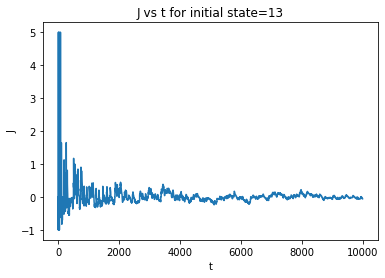

In [11]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=13')

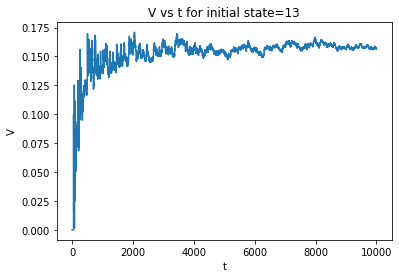

In [12]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))

### Case 2:  $s_{0} = 2$

In [13]:
initial_state = 2
runs = 10000
J, V = TD0(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=2')

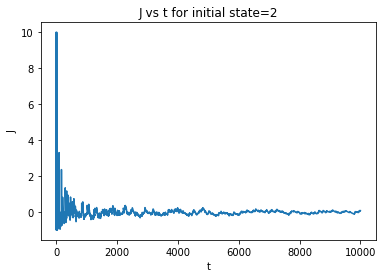

In [14]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=2')

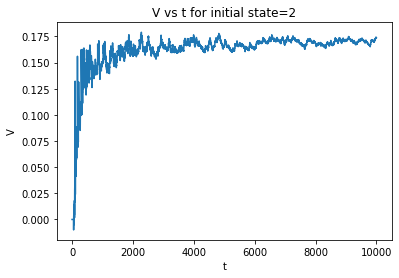

In [15]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))

### Case 3:  $s_{0} = 25$

In [16]:
initial_state = 25
runs = 10000
J, V = TD0(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=25')

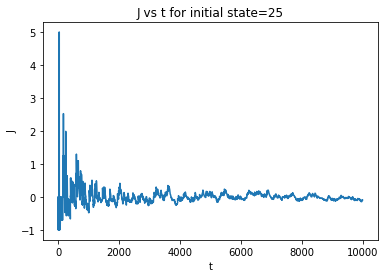

In [17]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=25')

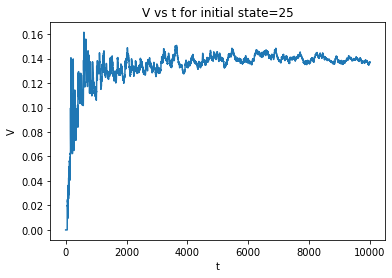

In [18]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))

## Scenario 2 - feature is a scalar

In [19]:
def TD0_scalar(initial_state=1, runs=1000):
    state = initial_state - 1
    runs = runs
    t = 0
    r_0 = 0
    J_0 = 0
    delta_0 = 0
    V_0 = 0
    alpha_0 = 1

    r_t_plus_1 = r_0
    J_t_plus_1 = J_0
    V_t_plus_1 = 0

    J = [0]
    V = [0]
    S = []
    A = []
    R = [0]

    fv_t = state/24
    for t in range(runs):
        action = pi(state)
        next_state = get_next_state(state, action)
        fv_t_plus_1 = next_state/24
        r_t_plus_1 = R_s_a[(state, action)]
        alpha_t = 1 / ((t//50) + 1)
        J_t_plus_1 = J_t_plus_1 + alpha_t*(r_t_plus_1 - J_t_plus_1)
        delta_t = r_t_plus_1 - J_t_plus_1 + V_t_plus_1*fv_t_plus_1 - V_t_plus_1*fv_t
        V_t_plus_1 = V_t_plus_1 + alpha_t*delta_t*fv_t
        fv_t = fv_t_plus_1
        state = next_state
        S.append(state)
        A.append(action)
        J.append(J_t_plus_1)
        V.append(V_t_plus_1)
        R.append(r_t_plus_1)
    return J, V
    

### Case 1:  $s_{0} = 13$

In [20]:
initial_state = 13
runs = 10000
J, V = TD0_scalar(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=13')

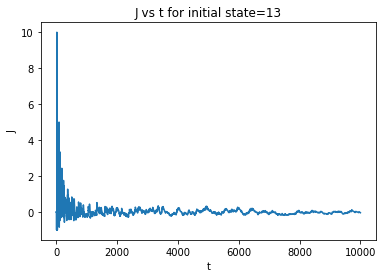

In [21]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=13')

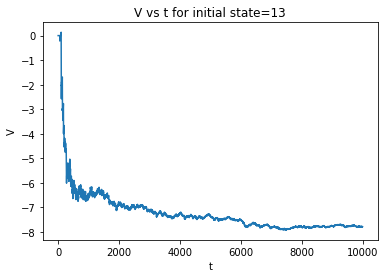

In [22]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))

### Case 2:  $s_{0} = 2$

In [23]:
initial_state = 2
runs = 10000
J, V = TD0_scalar(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=2')

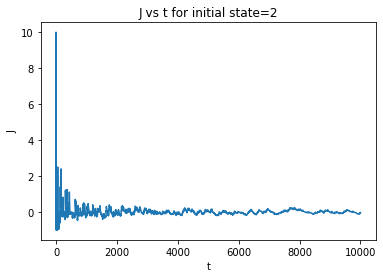

In [24]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=2')

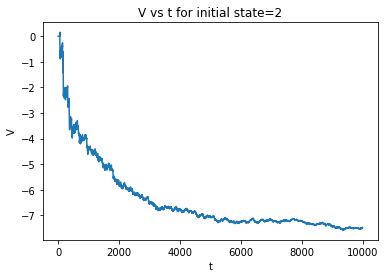

In [25]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))

### Case 3:  $s_{0} = 25$

In [26]:
initial_state = 25
runs = 10000
J, V = TD0_scalar(initial_state, runs)

Text(0.5, 1.0, 'J vs t for initial state=25')

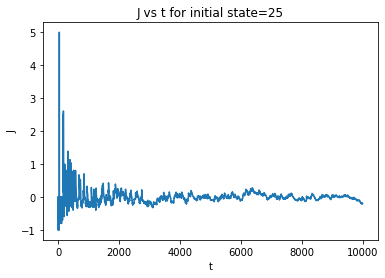

In [27]:
plt.plot(J)
plt.xlabel('t')
plt.ylabel('J')
plt.title('J vs t for initial state={}'.format(initial_state))

Text(0.5, 1.0, 'V vs t for initial state=25')

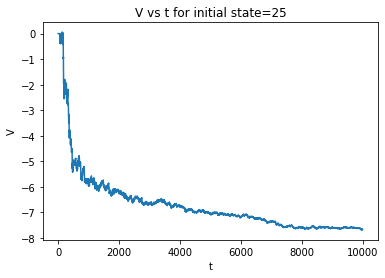

In [28]:
plt.plot(V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('V vs t for initial state={}'.format(initial_state))